In [15]:
pip install ucimlrepo

**1.a)** Faça as análises e alterações necessárias na base de dados para predizer a variável
ViolentCrimesPerPop usando regressão linear. Observe que essa base de dados
possui valores faltantes. Explique as considerações e mudanças propostas.

In [ ]:
# Importação das bibliotecas necessárias
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar o dataset
# O dataset escolhido é "Communities and Crime", que será usado para prever a taxa de crimes violentos em uma população
communities_and_crime = fetch_ucirepo(id=183)

# Separação dos dados em variáveis independentes (X) e variável alvo (y)
X = communities_and_crime.data.features
y = communities_and_crime.data.targets['ViolentCrimesPerPop']  # 'ViolentCrimesPerPop' é a variável que queremos prever

# Verificar os tipos de dados de cada coluna
# Esse passo ajuda a identificar possíveis colunas não numéricas que precisam ser tratadas
print("Tipos de dados das colunas:")
print(X.dtypes)

# --- Conversão de colunas para numérico, lidando com erros
# Aqui, tentamos converter todas as colunas para numéricas; valores que não puderem ser convertidos serão transformados em NaN (valores ausentes)
X = X.apply(pd.to_numeric, errors='coerce')

# Verificar valores faltantes após a conversão
# Isso ajuda a entender quantos valores ausentes temos em cada coluna após a conversão
print("Valores faltantes por coluna após conversão:")
print(X.isnull().sum())

# --- Tratamento de valores faltantes
# Definimos um limite para valores faltantes (30% dos dados), para decidir quais colunas remover
missing_threshold = 0.3 * len(X)

# Remover colunas que têm mais de 30% de valores ausentes, pois podem trazer mais ruído do que informações úteis
X = X.dropna(axis=1, thresh=missing_threshold)

# Preencher valores faltantes restantes com a média de cada coluna
# Essa é uma técnica básica de imputação, onde substituímos valores ausentes pela média da coluna para manter a consistência dos dados
X = X.fillna(X.mean())

# --- Remoção de variáveis irrelevantes
# Algumas variáveis, como 'communityname', não contribuem diretamente para prever a variável alvo e podem ser removidas
# Aqui, verificamos se essa coluna existe e a removemos se for o caso
if 'communityname' in X.columns:
    X = X.drop(['communityname'], axis=1)

# --- Dividir os dados em conjuntos de treino e teste
# Dividimos os dados em 80% para treino e 20% para teste, o que nos ajuda a avaliar o desempenho do modelo em dados que ele ainda não viu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Normalização dos dados
# Como estamos lidando com variáveis em escalas diferentes, usamos o StandardScaler para padronizar os dados
# O fit_transform é aplicado apenas ao conjunto de treino para evitar vazamento de dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajuste e transformação no conjunto de treino
X_test_scaled = scaler.transform(X_test)        # Transformação apenas no conjunto de teste, para usar o mesmo padrão do treino

Tipos de dados das colunas:
state                    int64
county                  object
community               object
communityname           object
fold                     int64
                        ...   
PolicOperBudg           object
LemasPctPolicOnPatr     object
LemasGangUnitDeploy     object
LemasPctOfficDrugUn    float64
PolicBudgPerPop         object
Length: 127, dtype: object
Valores faltantes por coluna após conversão:
state                     0
county                 1174
community              1177
communityname          1994
fold                      0
                       ... 
PolicOperBudg          1675
LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
Length: 127, dtype: int64


**1.b)** Divida aleatoriamente a base de dados em duas partes: treino, com 70% das
amostras, e teste, com 30%. Use a parte de treino para estimar um modelo linear que
melhor se ajuste aos dados. Obtenha os valores de RMSE e MAE sobre o conjunto
de treino e teste.

In [ ]:
# Importação das bibliotecas necessárias para dividir o dataset, criar o modelo e avaliar o desempenho
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Dividir o dataset em treino e teste (70% para treino, 30% para teste)
# Essa divisão nos ajuda a avaliar a performance do modelo em dados que ele não viu antes (conjunto de teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# --- Ajustar o modelo de regressão linear
# Instanciamos o modelo de regressão linear e o ajustamos usando o conjunto de treino
# A regressão linear tentará encontrar uma relação linear entre as variáveis independentes (X) e a variável alvo (y)
model = LinearRegression()
model.fit(X_train, y_train)  # Ajusta o modelo com os dados de treino

# --- Fazer previsões no conjunto de treino e teste
# Usamos o modelo ajustado para prever os valores de y com base nos dados de treino e teste
# Isso nos permite verificar como o modelo está se comportando tanto em dados vistos (treino) quanto em dados novos (teste)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# --- Avaliar o modelo usando RMSE e MAE
# O RMSE (Root Mean Squared Error) e o MAE (Mean Absolute Error) são métricas de erro comuns para avaliar a qualidade do modelo
# Quanto menores os valores de RMSE e MAE, melhor o modelo está ajustando os dados
# Avaliamos o erro tanto no conjunto de treino quanto no de teste para ver se o modelo está superajustado (overfitting) ou subajustado (underfitting)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))  # RMSE no treino
mae_train = mean_absolute_error(y_train, y_train_pred)           # MAE no treino

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))     # RMSE no teste
mae_test = mean_absolute_error(y_test, y_test_pred)              # MAE no teste

# Exibindo os resultados das métricas de erro
print(f"Treino - RMSE: {rmse_train}, MAE: {mae_train}")
print(f"Teste - RMSE: {rmse_test}, MAE: {mae_test}")

# Os coeficientes indicam a importância de cada variável no modelo linear; valores altos significam maior influência
# Essa tabela nos ajuda a entender quais variáveis mais impactam na previsão da taxa de crimes violentos
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoeficientes das variáveis:")
print(coefficients.sort_values(by='Coefficient', ascending=False))



Treino - RMSE: 0.12883918759717394, MAE: 0.09169397035221455
Teste - RMSE: 0.1326921988990524, MAE: 0.09635167069252716

Coeficientes das variáveis:
                  Coefficient
PersPerOccupHous     0.089533
MalePctDivorce       0.087655
PctHousOwnOcc        0.080846
PctRecImmig8         0.078728
MedRent              0.064767
...                       ...
OwnOccLowQuart      -0.047269
RentLowQ            -0.058749
whitePerCap         -0.063586
TotalPctDiv         -0.109126
PctPersOwnOccup     -0.114652

[104 rows x 1 columns]


**1.c)** Aplique PCA sobre os dados de treino para reduzir os dados para 5 atributos. Realize
análise gráfica sobre as variáveis e proponha alterações para melhorar o modelo de
regressão linear (que poderá ser um modelo polinomial). Com esses atributos,
obtenha os valores de RMSE e MAE sobre o conjunto de treino e teste. Compare
com os resultados da letra b).

Treino (PCA) - RMSE: 0.16107079538366229, MAE: 0.1160381675824688
Teste (PCA) - RMSE: 0.14768335385918613, MAE: 0.10945609389983958


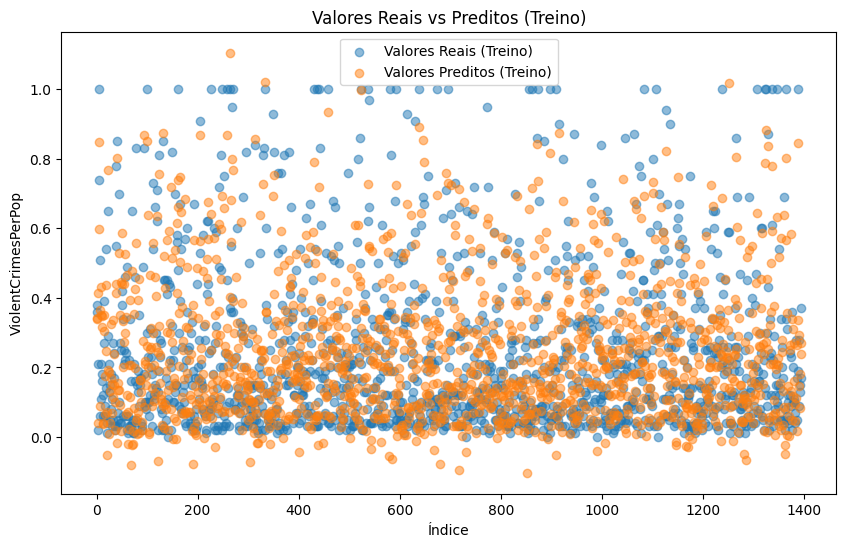

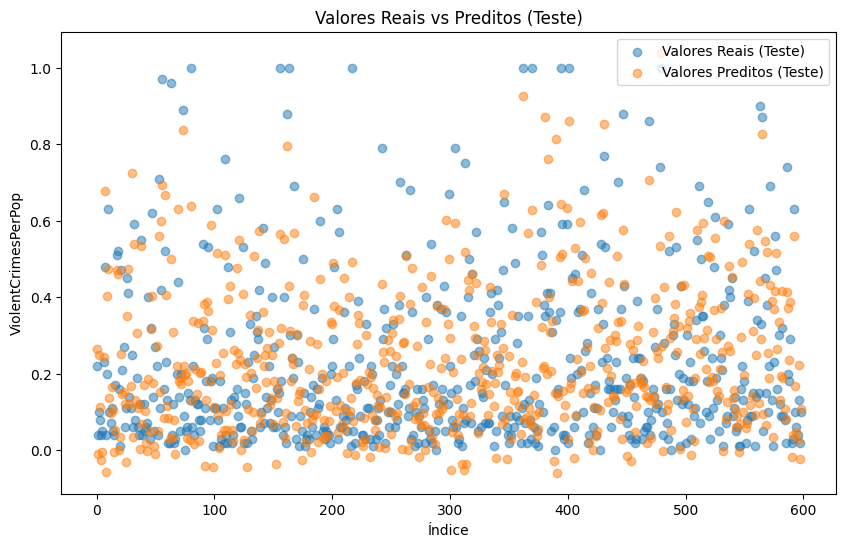

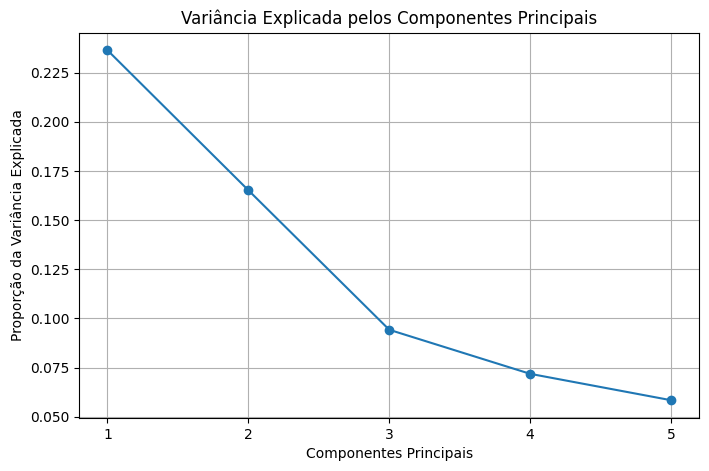

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- Aplicar PCA para reduzir os dados de treino para 5 atributos
# O PCA (Análise de Componentes Principais) é usado para reduzir a dimensionalidade dos dados
# A ideia é transformar as variáveis originais em um novo conjunto de variáveis (componentes) que capturam a maior parte da variância
# Neste caso, reduzimos os dados para os 5 principais componentes
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)  # Ajuste do PCA e transformação do conjunto de treino
X_test_pca = pca.transform(X_test)        # Transformação do conjunto de teste com o mesmo PCA

# --- Ajustar um modelo de regressão linear com os dados transformados
# Criamos um novo modelo de regressão linear, mas agora usando os dados com os componentes principais do PCA
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)  # Ajuste do modelo de regressão com os dados de treino transformados

# --- Fazer previsões no conjunto de treino e teste com PCA
# Usamos o modelo ajustado para prever os valores de y com base nos dados transformados do treino e do teste
y_train_pred_pca = model_pca.predict(X_train_pca)
y_test_pred_pca = model_pca.predict(X_test_pca)

# --- Avaliar o modelo usando RMSE e MAE
# Calculamos o erro do modelo usando RMSE e MAE, como feito anteriormente
# A comparação entre os erros com e sem PCA ajuda a avaliar se a redução de dimensionalidade impactou a performance
rmse_train_pca = np.sqrt(mean_squared_error(y_train, y_train_pred_pca))
mae_train_pca = mean_absolute_error(y_train, y_train_pred_pca)

rmse_test_pca = np.sqrt(mean_squared_error(y_test, y_test_pred_pca))
mae_test_pca = mean_absolute_error(y_test, y_test_pred_pca)

# Exibindo as métricas de erro para treino e teste com PCA
print(f"Treino (PCA) - RMSE: {rmse_train_pca}, MAE: {mae_train_pca}")
print(f"Teste (PCA) - RMSE: {rmse_test_pca}, MAE: {mae_test_pca}")

# --- Análise gráfica das variáveis
# Visualizamos os valores reais vs preditos para o conjunto de treino e de teste
# Isso ajuda a observar se o modelo está capturando bem a relação ou se há uma diferença entre os valores reais e preditos

# Gráfico de valores reais vs preditos no conjunto de treino
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_train)), y_train, label='Valores Reais (Treino)', alpha=0.5)
plt.scatter(range(len(y_train_pred)), y_train_pred, label='Valores Preditos (Treino)', alpha=0.5)
plt.title('Valores Reais vs Preditos (Treino)')
plt.xlabel('Índice')
plt.ylabel('ViolentCrimesPerPop')
plt.legend()
plt.show()

# Gráfico de valores reais vs preditos no conjunto de teste
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Valores Reais (Teste)', alpha=0.5)
plt.scatter(range(len(y_test_pred)), y_test_pred, label='Valores Preditos (Teste)', alpha=0.5)
plt.title('Valores Reais vs Preditos (Teste)')
plt.xlabel('Índice')
plt.ylabel('ViolentCrimesPerPop')
plt.legend()
plt.show()

# Aqui mostramos a proporção da variância explicada por cada um dos 5 componentes principais
# Esse gráfico é útil para entender o quanto de informação é mantida com cada componente
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), pca.explained_variance_ratio_, marker='o')
plt.title('Variância Explicada pelos Componentes Principais')
plt.xlabel('Componentes Principais')
plt.ylabel('Proporção da Variância Explicada')
plt.xticks(range(1, 6))
plt.grid()
plt.show()


In [ ]:
pip install ucimlrepo

**2.a)** kNN com métrica de distância Euclidiana. Escolha 5 valores diferentes de k. Para
selecionar o melhor valor de k divida a base de treinamento em duas partes iguais:
uma para treinar e a outra para validar e encontrar o melhor valor de k;

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from ucimlrepo import fetch_ucirepo

# Carrega o dataset HTRU2
# Esse dataset contém características de pulsos de rádio, e o objetivo é classificar se um pulso é de um pulsar (estrela de nêutrons) ou não
htru2 = fetch_ucirepo(id=372)
X = htru2.data.features  # Atributos do dataset
y = htru2.data.targets    # Variável alvo (classe pulsar ou não)

# Valores de k a serem testados no kNN
k_values = [1, 3, 5, 7, 9]

# Inicialização de listas para armazenar as métricas de cada execução
accuracies = []
precisions = []
recalls = []

# Realiza 5 execuções com diferentes partições de dados para robustez dos resultados
for i in range(5):
    # Divide o conjunto de dados em treino (6000 amostras) e teste (restante)
    # A divisão é estratificada para manter a proporção de classes
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=6000, stratify=y, random_state=i)

    # Divide o conjunto de treino em duas partes iguais para criar um conjunto de validação
    # Esse conjunto será usado para encontrar o melhor valor de k
    X_train_k, X_val, y_train_k, y_val = train_test_split(X_train, y_train, train_size=0.5, stratify=y_train, random_state=i)

    # Avalia cada valor de k no conjunto de validação para encontrar o melhor
    best_k = k_values[0]
    best_accuracy = 0
    for k in k_values:
        # Cria o modelo kNN com o valor atual de k e métrica euclidiana de distância
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train_k, y_train_k)  # Treina o modelo no subconjunto de treino

        # Avalia o modelo no conjunto de validação
        val_accuracy = accuracy_score(y_val, knn.predict(X_val))

        # Atualiza o melhor k baseado na maior acurácia de validação
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_k = k

    # Treina o modelo final no conjunto completo de treino com o melhor k encontrado
    knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)  # Faz previsões no conjunto de teste

    # Calcula e armazena as métricas de avaliação para esta execução
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='binary'))
    recalls.append(recall_score(y_test, y_pred, average='binary'))

# Calcula as métricas médias para as 5 execuções, fornecendo uma estimativa mais robusta
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)

# Exibe as métricas médias de desempenho do modelo
print(f"Média de Acurácia: {mean_accuracy:.4f}")
print(f"Média de Precisão: {mean_precision:.4f}")
print(f"Média de Recall: {mean_recall:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Média de Acurácia: 0.9728
Média de Precisão: 0.9088
Média de Recall: 0.7820


**2.b)** Compare os resultados, tempos de execução e número de protótipos usados por
cada valor de k da letra a). Considerando a distribuição das classes, você considera o
valor da acurácia média relevante? Por quê?

In [ ]:
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from ucimlrepo import fetch_ucirepo

# Carrega o dataset HTRU2, que contém características de pulsos de rádio
# O objetivo é classificar se o pulso é de um pulsar (estrela de nêutrons) ou não
htru2 = fetch_ucirepo(id=372)
X = htru2.data.features  # Atributos do dataset
y = htru2.data.targets    # Variável alvo (classe pulsar ou não)

# Define uma lista de valores de k que serão testados no algoritmo kNN
k_values = [1, 3, 5, 7, 9]

# Inicializa listas para armazenar as métricas de desempenho e o tempo de execução de cada execução
accuracies = []
precisions = []
recalls = []
times = []

# Realiza 5 execuções do processo para obter uma média mais robusta das métricas
for i in range(5):
    # Divide o dataset em treino (6000 amostras) e teste (restante)
    # A divisão é estratificada para manter a proporção de classes original
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=6000, stratify=y, random_state=i)

    # Divide o conjunto de treino em duas partes iguais para validação
    # Este conjunto de validação ajudará a escolher o melhor valor de k
    X_train_k, X_val, y_train_k, y_val = train_test_split(X_train, y_train, train_size=0.5, stratify=y_train, random_state=i)

    # Define as variáveis para armazenar o melhor valor de k e sua acurácia associada
    best_k = k_values[0]
    best_accuracy = 0
    for k in k_values:
        # Inicia a contagem de tempo para medir o desempenho do cálculo com o valor atual de k
        start_time = time.time()

        # Cria e treina o modelo kNN com k vizinhos e distância euclidiana
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train_k, y_train_k)

        # Avalia a acurácia do modelo no conjunto de validação
        val_accuracy = accuracy_score(y_val, knn.predict(X_val))

        # Atualiza o melhor valor de k baseado na maior acurácia obtida
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_k = k

        # Armazena o tempo de execução para o valor de k atual
        times.append((k, time.time() - start_time))

    # Treina o modelo final no conjunto completo de treino usando o melhor valor de k
    knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)  # Realiza previsões no conjunto de teste

    # Calcula e armazena as métricas de avaliação para esta execução
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='binary'))
    recalls.append(recall_score(y_test, y_pred, average='binary'))

# Calcula as médias das métricas de avaliação para as 5 execuções, obtendo uma estimativa mais confiável
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)

# Exibe as métricas médias de desempenho do modelo
print(f"Média de Acurácia: {mean_accuracy:.4f}")
print(f"Média de Precisão: {mean_precision:.4f}")
print(f"Média de Recall: {mean_recall:.4f}")



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Média de Acurácia: 0.9728
Média de Precisão: 0.9088
Média de Recall: 0.7820


**3.a)** Construa uma árvore de decisão com dois níveis de nó de decisão (isto é, o primeiro
nó de decisão (primeiro nível), os nós de decisão abaixo dele (segundo nível) e em
seguida os nós folha) usando a medida de Ganho de Informação. Selecione
aleatoriamente 10000 amostras dos dados para treinamento que serão usados para
construir a árvore. Retorne a estrutura da árvore construída.

<ipython-input-36-7ac7ec94d6b9>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['form'] = X['form'].replace({'complete': 1, 'completed': 1, 'foster': 0, 'incomplete': 0})
<ipython-input-36-7ac7ec94d6b9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['form'] = X['form'].replace({'complete': 1, 'completed': 1, 'foster': 0, 'incomplete': 0})
<ipython-input-36-7ac7ec94d6b9>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explic

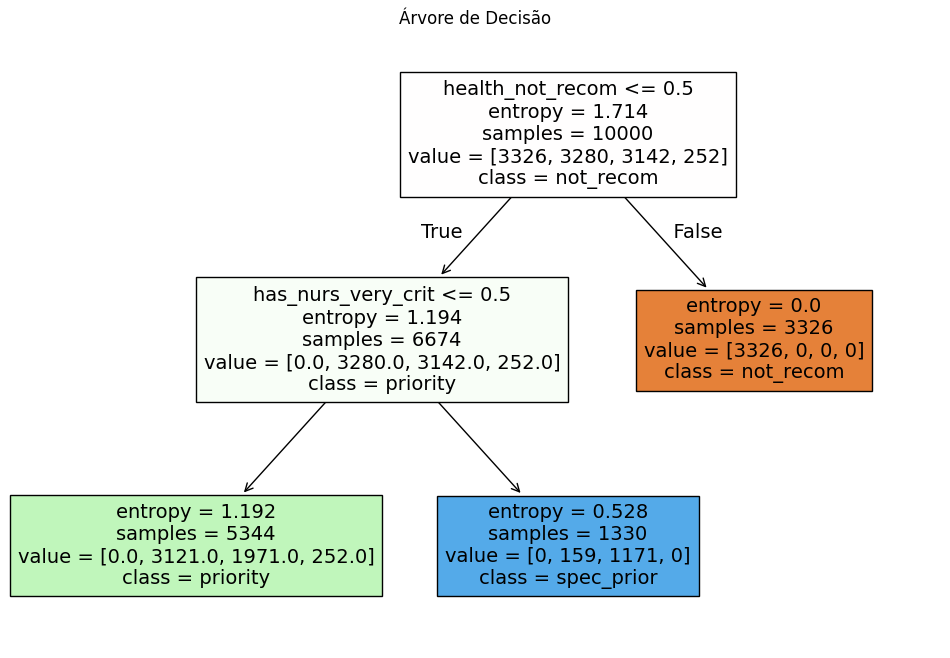

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import accuracy_score, precision_score

# Carregar o dataset com ID 76 do repositório UCI
nursery = fetch_ucirepo(id=76)

X = nursery.data.features
y = nursery.data.targets

# Transforma colunas string com valores binários em int
X['form'] = X['form'].replace({'complete': 1, 'completed': 1, 'foster': 0, 'incomplete': 0})
X['finance'] = X['finance'].replace({'convenient': 1, 'inconv': 0})

# Realiza o get_dummies nas colunas que possuem mais de 2 valores e depois dropa a coluna
coluna_tratada = pd.get_dummies(X['parents'],prefix='parents', dtype='int')
for col in coluna_tratada.columns:
  X[col] = coluna_tratada[col]
X.drop('parents', axis=1, inplace=True)

coluna_tratada = pd.get_dummies(X['has_nurs'],prefix='has_nurs', dtype='int')
for col in coluna_tratada.columns:
  X[col] = coluna_tratada[col]
X.drop('has_nurs', axis=1, inplace=True)

coluna_tratada = pd.get_dummies(X['children'],prefix='children', dtype='int')
for col in coluna_tratada.columns:
  X[col] = coluna_tratada[col]
X.drop('children', axis=1, inplace=True)

coluna_tratada = pd.get_dummies(X['housing'],prefix='housing', dtype='int')
for col in coluna_tratada.columns:
  X[col] = coluna_tratada[col]
X.drop('housing', axis=1, inplace=True)

coluna_tratada = pd.get_dummies(X['social'],prefix='social', dtype='int')
for col in coluna_tratada.columns:
  X[col] = coluna_tratada[col]
X.drop('social', axis=1, inplace=True)

coluna_tratada = pd.get_dummies(X['health'],prefix='health', dtype='int')
for col in coluna_tratada.columns:
  X[col] = coluna_tratada[col]
X.drop('health', axis=1, inplace=True)

# Selecionar 10.000 amostras aleatoriamente
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=10000, random_state=42)

# Árvore de decisão com profundidade máxima de 2 usando Entropia (Ganho de Informação)
modelo_arvore = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=42)
modelo_arvore.fit(X_train, y_train)

# Visualizar a estrutura da árvore de decisão
plt.figure(figsize=(12, 8))
plot_tree(modelo_arvore, feature_names=X.columns, class_names=[str(cls) for cls in modelo_arvore.classes_], filled=True)
plt.title("Árvore de Decisão")
plt.show()



**b)** Use os restantes dos dados para avaliação. Retorne a acurácia obtida.

In [37]:


y_pred = modelo_arvore.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' para múltiplas classes

print(f'Precisão: {precision:.2f}')
print(f"Acurácia: {accuracy:.2f}")

Precisão: 0.80
Acurácia: 0.77


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**c)** Tente obter as regras de decisão a partir da árvore construída.

In [38]:
# Buscando as regras de decisão
regras = export_text(modelo_arvore, feature_names=X.columns)
print(regras)

|--- health_not_recom <= 0.50
|   |--- has_nurs_very_crit <= 0.50
|   |   |--- class: priority
|   |--- has_nurs_very_crit >  0.50
|   |   |--- class: spec_prior
|--- health_not_recom >  0.50
|   |--- class: not_recom



**4)** 4. Explique o dilema entre bias e variância e o seu relacionamento com underfitting e overfitting.

**R:** O modelo ideal precisa encontrar um equilíbrio entre bias e variância,
para minimizar o erro total. O ajuste da complexidade do modelo possibilita isso.

Modelos simples podem ter alto bias e baixa variância (favorecendo o underfitting).
Modelos complexos podem ter baixo bias e alta variância (favorecendo o overfitting).

Existem técnicas que possibilitam alcançar um melhor equilíbrio, como regularização
(Lasso e Ridge) ou métodos de ensemble (bagging e boosting) que ajudam a reduzir a
variância sem aumentar o bias excessivamente, melhorando a capacidade do modelo de
generalizar.

O Underfitting ocorre quando o modelo possui um bias muito alto e uma variância baixa.
O modelo não captura a complexidade dos dados e generaliza mal, apresentando baixo
desempenho tanto no conjunto de treinamento quanto no de teste. Isso geralmente ocorre
em modelos muito simples ou com poucas variáveis.

Overfitting ocorre quando o modelo possui variância muito alta e bias baixo. Neste caso,
o modelo se ajusta muito bem aos dados de treinamento, incluindo ruídos, mas falha ao
generalizar para dados novos. Isso ocorre com modelos muito complexos ou ao usar técnicas
que exageram na flexibilidade, como muitos parâmetros ou características.

**5)** Comente sobre a veracidade das afirmações:

**a)** “Quanto mais variáveis de entrada forem usadas em um modelo de aprendizado de
máquina, melhor será a qualidade do modelo”.

**R:** Depende das variáveis e o que elas representam para o problema, variáveis que não possuem valor para o problema, podem gerar problemas como Overfitting ou problemas de dimensionalidade.

**b)** “Independente da qualidade, quanto mais amostras forem obtidas para uma base de
dados, maior a tendência de se obter modelos mais adequados”.

**R:** Esta afirmação está equivocada, pois, a qualidade dos dados impacta diretamente na precisão e acurácia do modelo. Para obter uma base de maior qualidade, é necessário realizar procedimentos nela antes de treinar o modelo.

**c)** “Às vezes com simples manipulações na base de dados (limpeza, conversão de
valores, etc.) pode-se conseguir melhoras significativas nos resultados, sem fazer
nenhuma alteração na técnica de aprendizado de máquina usada”.

**R:** Esta afirmação está correta. É possível obter uma melhora significativa nos resultados do modelo realizando um trabalho de Engenharia de Dados na base escolhida.

**6)** Em uma empresa é adotado um método de Aprendizado de Máquina para detectar defeito de
fabricação de peças mecânicas, sendo que raramente acontece este tipo de problema na
fábrica. Um funcionário anuncia empolgado que o sistema alcançou uma acurácia de 99%,
porém seu gerente não achou o resultado tão relevante.

**a)** Por que o gerente não ficou empolgado com o resultado achado?

**R:** Porque uma peça com avaria já era um acontecimento raro, o modelo previu aquilo que já era sabido pelo gerente.

**b)** O que o funcionário poderia fazer para confirmar se o método empregado é
adequado para o problema?

**R:** Ele pode verificar outras métricas como F1-score, Recall, Precision. Verificando outras métricas é possível apresentar novos resultados.

**7)** Como pode ser usada uma árvore (de regressão ou de decisão) para avaliar uma amostra quando ela possui uma ou mais variáveis faltantes?

**R:** Necessário realizar o pré-processamento da base de dados, inserindo a média dos valores da base ou aplicando o classificador KNN que leva em consideração o valor dos dados mais próximos.